In [1]:
from sklearn import (metrics, datasets, linear_model)
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

# Цель Работы: изучить модели библиотеки sklearn

### Загружаем датасет методом load_breast_cancer
### В нем представлена бинарная классификация рака молочной железы

In [2]:
data = datasets.load_breast_cancer()

In [3]:
data_DF = pd.DataFrame(data.data, columns=data.feature_names)
data_DF['target'] = data.target
data_DF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Выделяем Эндогенную и Экзогенные переменные

In [4]:
X, y = data_DF.iloc[:, :-1], data_DF.iloc[:, -1]

In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

### Делим выборку на обучающую и тестовую части 70/30

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Создаем и обучаем простую модель множественной линейной регрессии

In [8]:
log_reg_model = linear_model.LogisticRegression(max_iter=2500)
log_reg_model.fit(X_train, y_train)

log_reg_model.score(X_test, y_test)

0.9590643274853801

### Как мы видим, точность данной модели составила ~96% что является очень хорошим показателем, но нужно понимать что датасет load_breast_cancer не является особо сложным

<Axes: >

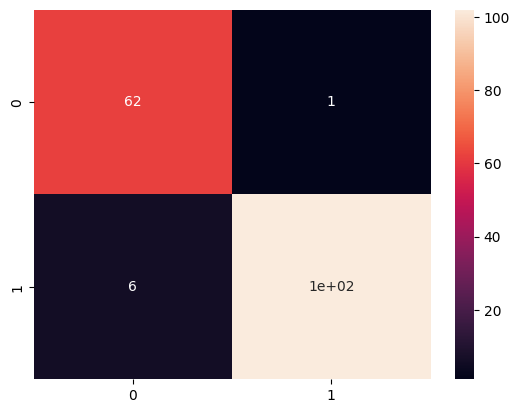

In [9]:
y_pred = log_reg_model.predict(X_test)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

### Попробуем использовать другие модели для получения лучшего результата

In [10]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [11]:
models = {
    'SVM с линейным ядром': SVC(kernel='linear'),
    'SVM с гауссовым ядром': SVC(kernel='rbf'),
    'SVM с полиномиальным ядром': SVC(kernel='poly'),
    'Метод ближайших соседей': KNeighborsClassifier(),
    'Многослойный перцептрон': MLPClassifier(max_iter=1000),
    'Дерево решений': DecisionTreeClassifier(),
    'Наивный байесовский классификатор': GaussianNB(),
    'Пассивно-агрессивный классификатор': PassiveAggressiveClassifier(),
    'Гребневый классификатор': RidgeClassifier(),
    'Случайный лес': RandomForestClassifier(),
    'Беггинг': BaggingClassifier()
}

### Создадим список уже обученных моделей

In [12]:
models_fitted = [model.fit(X_train, y_train) for _,model in models.items()]
models_fitted

[SVC(kernel='linear'),
 SVC(),
 SVC(kernel='poly'),
 KNeighborsClassifier(),
 MLPClassifier(max_iter=1000),
 DecisionTreeClassifier(),
 GaussianNB(),
 PassiveAggressiveClassifier(),
 RidgeClassifier(),
 RandomForestClassifier(),
 BaggingClassifier()]

### Теперь оценим точность каждой модели отсортировав по точности и построив матрицу ошибок для каждой модели

In [13]:
max_len = len(max(models.keys(), key=len)) + 8
print(f'|{"Название":=^{max_len}}|{"Точность":=^12}|')
for name,model in zip(models.keys(), models_fitted):
    print(f'|{name:^{max_len}}|{model.score(X_test, y_test):^12.4f}|')

|=================Название=================|==Точность==|
|           SVM с линейным ядром           |   0.9591   |
|          SVM с гауссовым ядром           |   0.9240   |
|        SVM с полиномиальным ядром        |   0.9181   |
|         Метод ближайших соседей          |   0.9474   |
|         Многослойный перцептрон          |   0.9474   |
|              Дерево решений              |   0.9064   |
|    Наивный байесовский классификатор     |   0.9240   |
|    Пассивно-агрессивный классификатор    |   0.9064   |
|         Гребневый классификатор          |   0.9649   |
|              Случайный лес               |   0.9649   |
|                 Беггинг                  |   0.9474   |


### Модель Случайного леса и Гребневого классификатора на практике оказались самыми эффективными, их точность сосотавила 96.5%, что только на 0.5% больше линейной регрессии

|=================Название=================|==Точность==|
|              Случайный лес               |   0.9649   |
|         Гребневый классификатор          |   0.9649   |
|           SVM с линейным ядром           |   0.9591   |
|                 Беггинг                  |   0.9474   |
|         Многослойный перцептрон          |   0.9474   |
|         Метод ближайших соседей          |   0.9474   |
|    Наивный байесовский классификатор     |   0.9240   |
|          SVM с гауссовым ядром           |   0.9240   |
|        SVM с полиномиальным ядром        |   0.9181   |
|    Пассивно-агрессивный классификатор    |   0.9064   |
|              Дерево решений              |   0.9064   |


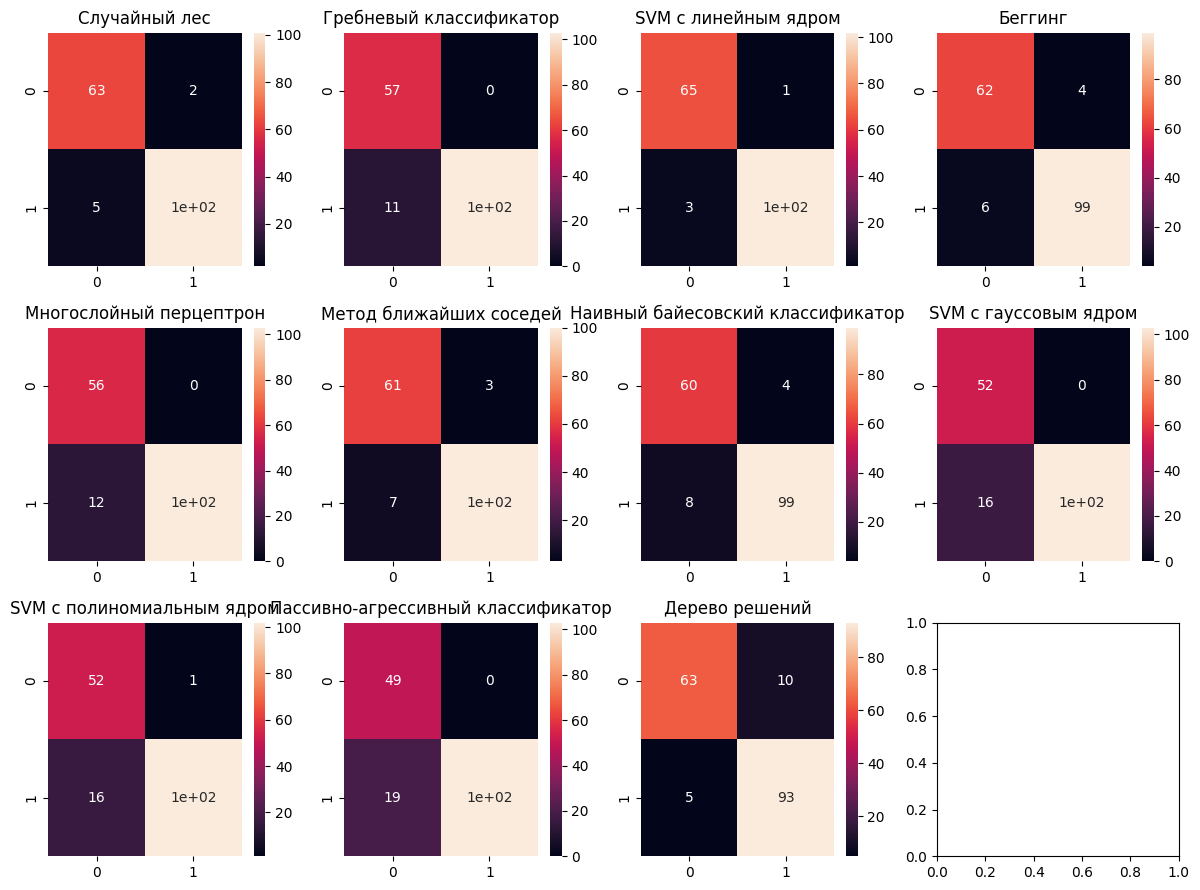

In [14]:
max_len = len(max(models.keys(), key=len)) + 8
print(f'|{"Название":=^{max_len}}|{"Точность":=^12}|')

scores = {name:model.score(X_test, y_test) for name,model in zip(models.keys(), models_fitted)}
sc_keys, sc_values = list(scores.keys()), list(scores.values())
sort_indexes = np.argsort(list(scores.values()))[::-1]

plt.subplots(3, 4, figsize=(12, 9))

for plot_number,index in enumerate(sort_indexes, start=1):
    print(f'|{sc_keys[index]:^{max_len}}|{sc_values[index]:^12.4f}|')

    y_test = models_fitted[index].predict(X_test)

    plt.subplot(3, 4, plot_number)
    plt.title(sc_keys[index])
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

plt.tight_layout()
plt.show()